In [1]:
# Generating a plot for the Gamow Window, compared to the Maxwell-Boltzmann distribution and the Coulomb barrier
# Using the 39K+p reaction at 100 MK

import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import pandas as pd
import math
from pdf2image import convert_from_path # convert pdf to png

In [60]:
Zt = 19
Zp = 1
T = 100 # in MK

k = 8.617333262 * 10**(-5) / 10**(6) # Boltzmann constant in MeV/K
At_atomic =  38963706.487 * 10**(-6) # Atomic mass of 39K
Aproton_atomic = 1007825.03190 * 10**(-6) # Atomic mass of proton
uam_eV = 931494.10242 * 10**(3) # [1 u = uam_eV eV]
Aelectron = 548579.909065 * 10**(-9) # [g/mole or u]
## Meng Wang et al 2021 Chinese Phys. C 45 030003
# M_N = M_A - (Z * Aelectron) + B_e
def atomic_to_nuclear_mass_conversion(atomic_mass, Z):
    return atomic_mass - (Z * Aelectron) + (((14.4381 * Z**(2.39)) + (1.55468 * 10**(-6) * Z**(5.35))) / uam_eV)

At = atomic_to_nuclear_mass_conversion(At_atomic, Zt)
Aproton = atomic_to_nuclear_mass_conversion(Aproton_atomic, Zp)
mu = Aproton * At / (Aproton + At)
kT = k * T * 10**(6) # Boltzmann constant [MeV/K] * T [in K]

twopi_sommerfeld_parameter_const =  0.98951013 * Zt * Zp * np.sqrt(mu) # Constant part of the 2pi * Sommerfeld parameter: 2pi S = 2pi S_const * 1/sqrt(E)

# Functions from 0.01 MeV to 10 MeV
E = np.linspace(0.01, 10.0, num = 10000)
one_over_sqrt_E = 1/np.sqrt(E)
P = np.exp(-1 * twopi_sommerfeld_parameter_const * one_over_sqrt_E)
Boltzmann_Factor = np.exp(-E / kT)
Gamow_Peak = P * Boltzmann_Factor

E_0 = 0.1220 * ((Zt)**2 * (Zp)**2 * mu * (T / (10)**3)**2)**(1/3)
DE_0 = 0.2368 * ((Zt)**2 * (Zp)**2 * mu * (T / (10)**3)**5)**(1/6)
DE_0_over2 = DE_0 / 2
E_0_upper = E_0 + DE_0_over2
E_0_lower = E_0 - DE_0_over2

In [61]:
print(E_0)
print(DE_0_over2)
print(E_0_upper)
print(E_0_lower)

0.18601557014134568
0.046232399672480266
0.23224796981382595
0.1397831704688654


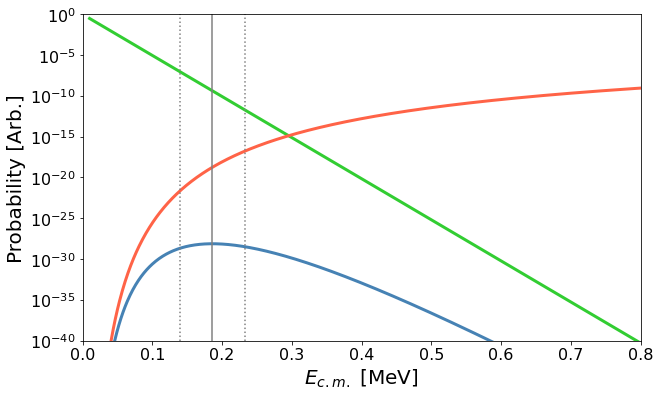

In [80]:
saveFig = False
plt.rcParams["figure.figsize"] = (10,6)

ax = py.subplot(111)
plt.plot(E, Boltzmann_Factor, c = 'limegreen',lw=3)#, label = r'$e^{-E/kT}$')
plt.plot(E, P, c = 'tomato',lw=3)#, label = r'$e^{-2 \pi \eta}$')
plt.plot(E, Gamow_Peak, c = 'steelblue',lw=3)#, label = r'$e^{-E/kT} e^{-2 \pi \eta}$')
plt.axvline(E_0,c='gray',ls='-')
plt.axvline(E_0_upper,c='gray',ls='dotted')
plt.axvline(E_0_lower,c='gray',ls='dotted')

#plt.legend(loc='upper right',fontsize=16,ncol=1)
ax.set_xlabel(r'$E_{c.m.}$'+ ' [MeV]', size = 20)
ax.set_ylabel('Probability [Arb.]', size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(0,0.8)
plt.ylim(1*10**-40, 1*10**0)
ax.semilogy()
#plt.grid(True, which = 'both')

if (saveFig):
    plt.savefig('Gamow_Window.pdf',dpi=600,bbox_inches='tight')
    plt.close()
    images = convert_from_path('Gamow_Window.pdf', 600)
    for image in images:
        image.save('Gamow_Window.png')
else:
    plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]